In [ ]:
run test_rank.py

In [ ]:
import test_rank

In [ ]:
import importlib
importlib.reload(test_rank)

In [ ]:
for j in range(2,20,2):
    betti_BP = betti_boundary_projection(vit_vec, project_on_simplices, boundary_sum_matrix, num_vertices,j, nv, 0.3, 2)
    for i in range(num_vertices):
        print("Betti Bound_proj",i, " = ", betti_BP[i] , "with deg = ", j)

In [ ]:
from scipy.sparse.linalg.eigen.arpack import eigsh as largest_eigsh

points = np.random.rand(7,4)
#points = [[0, 0, 0], [0, 1, 0], [1,0,0],[1,1,0], [0.5,0.5,1]]
vit_comp = vitoris_rips_complex(points, 0.4)
vit_vec = simplices_to_count_vector(vit_comp)
num_basis = len(vit_vec)
num_vertices = num_underlying_vertices_vector_length(num_basis)
boundary = boundary_operator(num_vertices)
boundary_matrix = matrix_from_pauli_operator(boundary)

#print("Boundary sum:")
boundary_sum = boundary_operator_hermitian(num_vertices)
boundary_sum_matrix = matrix_from_pauli_operator(boundary_sum)

project_on_simplices = np.zeros(np.shape(boundary_matrix)+(num_vertices,))
for i in range(num_vertices):
    project_on_simplices[..., i] = np.array(np.diag(d_dim_simplices_mask(i,vit_vec)), dtype=float)

laplacian_restricted = np.zeros(np.shape(boundary_sum_matrix)+(num_vertices,))
dim_simplices = np.zeros(num_vertices+1)
    
for i in range(num_vertices):
    dim_simplices[i] = np.sum(d_dim_simplices_mask(i,vit_vec))
    if i>0:
        project_up_down = project_on_simplices[...,i-1]
    else:
        project_up_down = np.zeros(np.shape(boundary_sum_matrix))

    if i < num_vertices-1:
        project_up_down += project_on_simplices[...,i+1]

    laplacian_restricted[...,i] = \
        project_on_simplices[...,i] \
        @ boundary_sum_matrix \
        @ project_up_down \
        @ boundary_sum_matrix \
        @ project_on_simplices[...,i] \

betti = np.zeros(num_vertices)
for i in range(num_vertices):
    rows = d_dim_simplices_mask(i, vit_vec)
    cols = rows
    if np.any(rows) and np.any(cols):
        tmp_mat = laplacian_restricted[..., i][rows][:,cols]
        v, w = np.linalg.eig(tmp_mat)
        print(tmp_mat.shape)
        print(v)


In [ ]:
from scipy.sparse.linalg.eigen.arpack import eigsh as largest_eigsh

points = np.random.rand(8,3)
#points = [[0, 0, 0], [0, 1, 0], [1,0,0],[1,1,0], [0.5,0.5,1]]
vit_comp = vitoris_rips_complex(points, 0.7)
vit_vec = simplices_to_count_vector(vit_comp)
num_basis = len(vit_vec)
num_vertices = num_underlying_vertices_vector_length(num_basis)
boundary = boundary_operator(num_vertices)
boundary_matrix = matrix_from_pauli_operator(boundary)

#print("Boundary sum:")
boundary_sum = boundary_operator_hermitian(num_vertices)
boundary_sum_matrix = matrix_from_pauli_operator(boundary_sum)

project_on_simplices = np.zeros(np.shape(boundary_matrix)+(num_vertices,))
for i in range(num_vertices):
    project_on_simplices[..., i] = np.array(np.diag(d_dim_simplices_mask(i,vit_vec)), dtype=float)


for i in range(num_vertices):
    i_dim_simplices = d_dim_simplices_mask(i,vit_vec)
    i_minus_1_dim_simplices = d_dim_simplices_mask(i-1, vit_vec)
    tmp_mat = project_on_simplices[...,i] @ (boundary_sum_matrix @ project_on_simplices[...,i-1])
    tmp_mat = tmp_mat[i_minus_1_dim_simplices][:,i_dim_simplices]
    v, w = np.linalg.eig(tmp_mat.T @ tmp_mat)
   # e, vec = largest_eigsh(tmp_mat.T @ tmp_mat, 1, which ='LM')
    print(tmp_mat.shape)
    print(v)

In [ ]:
for j in range(2,20,2):
    betti_lap = betti_Laplacian_restricted(vit_vec, project_on_simplices, boundary_sum_matrix, num_vertices,j, nv, 0.2, 2)
    for i in range(num_vertices):
        print("Betti Bound_proj",i, " = ", betti_lap[i] , "with deg = ", j)

In [ ]:
run classical_homology.py

In [ ]:
points = np.random.rand(6,3)
points

In [ ]:
a = range(10)
b = np.zeros(10)
A = np.diag(np.concatenate([a,b]))
rank_estimation(A, 10, 30, 0.1, 1)

In [ ]:
LA.matrix_rank(A)

In [ ]:
v = np.random.randn(20)
v= v/LA.norm(v)
mom = compute_moments(A, v, deg)
mom

In [ ]:
import matplotlib.pyplot as plt
from rank_estimation import Chebyshev_step 
from rank_estimation import compute_Chebyshev_moments
import numpy as np
deg = 3
x = np.linspace(0,1,num=100)
y= np.zeros(len(x))
y1= np.zeros(len(x))
cheb_mom = np.zeros((len(x), deg+1))
for i in range(len(x)):
    xi = x[i]
    mom = np.zeros(deg+1)
    for j in range(deg+1):
        if j == 0:
            mom[j] = 1
        else:
            mom[j] = np.dot(xi, mom[j-1])
    cheb_mom[i,:] = compute_Chebyshev_moments(mom)
    mu = Chebyshev_step(deg, 0.1, 1)
    y[i] = np.dot(mu,cheb_mom[i,:])
    mu = Chebyshev_step(deg, 0.1, 2)
    y1[i] = np.dot(mu,cheb_mom[i,:])
    
plt.plot(x,y)
plt.plot(x,y1)

In [ ]:
A = boundary_matrix(10) 
r = rank_estimation((A+A.transpose())/2, 4, 30, 0.01, 2)
int(r)

In [ ]:
qiskit.__version__

In [ ]:
np.zeros([2,2])

In [ ]:
import numpy as np
points = [[0, 0], [1, 0.5], [0,1.5],[1,2]]
np.mean(points,0)

In [ ]:
from scipy.stats import kurtosis
kurtosis(points,0)

In [ ]:
np.var(points,0)

In [ ]:
from scipy.stats import skew
skew(points,0)

In [ ]:
A = np.array([[ 0.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  1.],
       [ 1.,  0.,  0., -1.],
       [ 0.,  1., -1.,  0.]])

In [ ]:
from numpy import linalg as LA
LA.matrix_rank(A)

In [ ]:
B= A @ A

In [ ]:
from classical_homology import one_skeleton_square, one_skeleton_unfilled_cube
from quantum_homology import expectation_over_random_hadamard_vecs
edges_in, num_ver= one_skeleton_unfilled_cube()
exp_value = expectation_over_random_hadamard_vecs(num_ver, edges_in, powers=range(2), num_samples=1)
exp_value

In [ ]:
eps = 0.01
damp = 2
deg = 4
pwr = range(deg)
nv = 4
rank = np.zeros([nv,num_ver-1])
exp_tensor = expectation_over_random_hadamard_vecs(num_ver, edges_in, powers=pwr, num_samples=nv)
#exp_tensor = exp_value
for l in range(nv):
    for k in range(num_ver-1):
       # scal = num_ver**(k+1)
        exp_value = np.append([1], exp_tensor[l,:,k])
        cheb_mom = compute_Chebyshev_moments(exp_value)
        mu = Chebyshev_step(deg, eps, damp)
        rk = np.dot(cheb_mom, mu)
        rank[l,k] = num_ver*rk
        
np.mean(rank,0)

In [ ]:
for l in range(nv):
    for k in range(num_ver-1):
        #scal = num_ver**(k+1)
        exp_value = np.append([1], exp_tensor[l,:,k])
        cheb_mom = compute_Chebyshev_moments(exp_value)
        print(exp_value)
        mu = Chebyshev_step(deg, eps, damp)
        rk = np.dot(cheb_mom, mu)
        rank[l,k] = num_ver*rk
        
np.mean(rank,0)

In [ ]:
from classical_homology import vitoris_rips_complex_from_one_skeleton, classical_laplacian_of_vit_vec, simplices_to_count_vector
vit_comp = vitoris_rips_complex_from_one_skeleton(num_ver, edges_in)
vit_vec = simplices_to_count_vector(vit_comp)
laplacian_restricted = classical_laplacian_of_vit_vec(vit_vec)

betti = np.zeros(num_ver)
for i in range(num_ver):
    rows = d_dim_simplices_mask(i, vit_vec)
    cols = rows
    if np.any(rows) and np.any(cols):
        tmp_mat = laplacian_restricted[..., i][rows][:, cols]
        betti[i] = (rank_estimation(
                    (tmp_mat @ tmp_mat.T), deg, nv, eps, damp))
            # np.sum(rows) equivalent to d_dim_simplices[i]
    else:
        betti[i] = 0

betti

In [ ]:
import test.test_quantum_homology_advanced
mylaplace = test.test_quantum_homology_advanced.Expectation_of_Laplacian_TestCase()
mylaplace.setUp()
mylaplace.test_expectation_01()
#mylaplace.test_run_random()

In [ ]:
from classical_homology import vitoris_rips_complex_from_one_skeleton, classical_laplacian_of_vit_vec, simplices_to_count_vector
from rank_estimation import expectation_hadamard
vit_comp = vitoris_rips_complex_from_one_skeleton(num_ver, edges_in)
vit_vec = simplices_to_count_vector(vit_comp)
laplacian_restricted = classical_laplacian_of_vit_vec(vit_vec)

for i in range(num_ver):
    rows = d_dim_simplices_mask(i, vit_vec)
    cols = rows
    if np.any(rows) and np.any(cols):
        tmp_mat = laplacian_restricted[..., i][rows][:, cols]
        mom = (expectation_hadamard(
                    (tmp_mat @ tmp_mat.T), deg, nv, eps, damp))
        print(mom)
    else:
        betti[i] = 0

In [ ]:
!pip3 install qiskit-honeywell-provider

In [ ]:
from qiskit.providers.honeywell import Honeywell

In [ ]:
Honeywell.save_account('lhoresh@us.ibm.com')

In [ ]:
Honeywell.load_account()

In [ ]:
backends = Honeywell.backends()
device = 'HQS-LT-S2'
backend = Honeywell.get_backend(device)

In [ ]:
job = backend.retrieve_job('c90c48da23c448dc97f6054bd9d45cee') # Substitute your own job_id here
result = job.result()
counts = result.get_counts()
import sys 
stdoutOrigin=sys.stdout 
sys.stdout = open("square_counts.txt", "w")
print(counts)
sys.stdout.close()
sys.stdout=stdoutOrigin

In [ ]:
backends = Honeywell.backends()
device = 'HQS-LT-S2-SIM'
backend = Honeywell.get_backend(device)
job = backend.retrieve_job('a4a1b5e611834caeb36282d41000b827') # Substitute your own job_id here
result = job.result()
counts = result.get_counts()
stdoutOrigin=sys.stdout 
sys.stdout = open("Count_square_sim_500_shots_deg3_vec4.txt", "w")
print(counts)
sys.stdout.close()
sys.stdout=stdoutOrigin

In [ ]:
print(result)

In [ ]:
with open('Count_cube_sim_1000_shots.txt') as f:
    data = f.read()
    print(data)

In [ ]:
from qiskit.visualization import plot_histogram

In [ ]:
!pip3 install qiskit-terra

In [ ]:
from quantum_rank_estimation import quantum_rank_estimation, quantum_Betti_estimation
from classical_homology import one_skeleton_square, one_skeleton_unfilled_cube
eps = 0.01
damp = 2
deg = 5
nv = 1
pwr = range(deg)
edges_in, num_ver= one_skeleton_square()
#edges_in, num_ver = [[0,1]] , 2
#edges_in, num_ver= one_skeleton_unfilled_cube()
#dimHk =  [ 8, 18, 12, 0, 0, 0, 0]
dimHk = [4, 4, 0]
#rank = quantum_rank_estimation(edges_in, num_ver, pwr, nv, eps, damp)
Betti = quantum_Betti_estimation(edges_in, num_ver, dimHk, pwr, nv, eps, damp, [0.00,0.0], expt_name = None, save = False)
Betti

In [ ]:
No noise : array([1.39792841, 1.27119665, 0.        ])
Noise (0.001): array([1.42281703, 1.35898137, 0.        ])
Noise (0.005): array([1.45420094, 1.45964984, 0.        ])
Noise (0.01): array([1.46864872, 1.41010404, 0.        ])
Noise (0.05): array([1.58682813, 1.53805871, 0.        ])
Noise (0.1): array([1.65800044, 1.67416625, 0.        ])

/usr/local/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/usr/local/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


width:  7 depth:  13
width:  8 depth:  25
width:  10 depth:  48
width:  11 depth:  60
width:  13 depth:  83
Discarding all 1s vector
width:  7 depth:  13
width:  8 depth:  25
width:  10 depth:  48
width:  11 depth:  60
width:  13 depth:  83
width:  7 depth:  13
width:  8 depth:  25
width:  10 depth:  48
width:  11 depth:  60
width:  13 depth:  83
Discarding all 1s vector
Discarding all 1s vector
width:  7 depth:  13
width:  8 depth:  25
width:  10 depth:  48
width:  11 depth:  60
width:  13 depth:  83
width:  7 depth:  13
width:  8 depth:  25
width:  10 depth:  48
width:  11 depth:  60
width:  13 depth:  83
width:  7 depth:  13
width:  8 depth:  25
width:  10 depth:  48
width:  11 depth:  60
width:  13 depth:  83
width:  7 depth:  13
width:  8 depth:  25
width:  10 depth:  48
width:  11 depth:  60
width:  13 depth:  83
width:  7 depth:  13
width:  8 depth:  25
width:  10 depth:  48
width:  11 depth:  60
width:  13 depth:  83
width:  7 depth:  13
width:  8 depth:  25
width:  10 depth:  

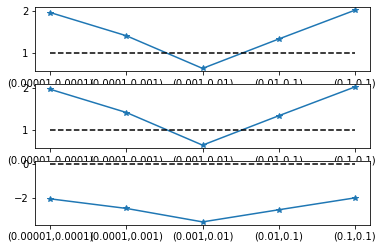

In [1]:
from quantum_rank_estimation import quantum_rank_estimation, quantum_Betti_estimation
from classical_homology import one_skeleton_square, one_skeleton_unfilled_cube, one_skeleton_random
from classical_homology import complex_one_skeleton, one_skeleton_remap
import matplotlib.pyplot as plt
import numpy as np
# import json
# points = json.load(open('cmb_sample_points.json', "r"))
# epsilon = 15
# edges_in, num_ver = one_skeleton_remap(complex_one_skeleton(points[0:7], epsilon))
eps = 0.05
damp = 2
deg = 5
nv = 5
pwr = range(deg)
#edges_in, num_ver= one_skeleton_random()
edges_in, num_ver = [[0,1]] , 2
alpha = range(-2,3)
dimHk = [4,4,0]
#dimHk =  [ 0, 0, 0, 0, 0, 0, 0]
#rank = quantum_rank_estimation(edges_in, num_ver, pwr, nv, eps, damp)
Betti = np.zeros((3, len(alpha)))
fig, axs = plt.subplots(3)
for idx, i in enumerate(alpha):
        Betti[:,idx] = quantum_Betti_estimation(edges_in, num_ver, dimHk, pwr, nv, eps, damp, \
                                              [0.001*(10**i),min(0.01*(10**i),0.1)],  save = False)
#"edge-surf-"+str(idx)
true_betti = [1,1,0]
xval =['(0.00001,0.0001)','(0.0001,0.001)','(0.001,0.01)','(0.01,0.1)','(0.1,0.1)']
for k in range(3):
    axs[k].plot(xval,Betti[k,:],'*-')
    axs[k].plot(xval,np.tile(true_betti[k],len(alpha)),'k--')
#plt.savefig('random8_noise_lvl_quantum.png')

In [ ]:
from quantum_rank_estimation import quantum_Betti_estimation_json
from classical_homology import one_skeleton_square, one_skeleton_unfilled_cube
eps = 0.05
damp = 0
deg = 5
nv = 5
pwr = range(deg)
#edges_in, num_ver= one_skeleton_square()
edges_in, num_ver= one_skeleton_unfilled_cube()
dimHk =  [ 8, 18, 12, 0, 0, 0, 0]
#dimHk = [4, 4, 0]
Betti = quantum_Betti_estimation_json( num_ver, dimHk, pwr, nv, eps, damp, expt_name = "cube")
Betti

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_rank_estimation import quantum_rank_estimation, quantum_Betti_estimation
from classical_homology import one_skeleton_square, one_skeleton_unfilled_cube
from classical_homology import complex_one_skeleton, one_skeleton_remap
eps = 0.005
damp = 0
deg = range(2,9)
nv = 10
num_vertices = 4
edges_in, num_ver= one_skeleton_square()
#edges_in, num_ver= one_skeleton_unfilled_cube()
#dimHk =  [ 8, 18, 12, 0, 0, 0, 0]
dimHk = [4, 4, 0]

fig, axs = plt.subplots(3)
Betti = np.zeros([num_vertices-1,len(deg)])
for idx,i in enumerate(deg):
    pwr= range(i)
   # Betti[:,idx] = classical_betti_from_rank_estimation_of_laplacian(vit_vec, i, nv, eps, damp)
    Betti[:,idx] = quantum_Betti_estimation(edges_in, num_ver, dimHk, pwr, nv, eps, damp, [0.000,0.000])

true_betti = [1,1,0]
for k in range(3):
    axs[k].plot(deg,Betti[k,:],'*-')
    axs[k].plot(deg,np.tile(true_betti[k],len(deg)),'k--')
plt.savefig('square_deg_quantum.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_rank_estimation import quantum_rank_estimation, quantum_Betti_estimation
from classical_homology import one_skeleton_square, one_skeleton_unfilled_cube
eps = 0.005
damp = 0
deg = 4
nv = range(5,31,5)
pwr= range(deg)
num_vertices = 4
edges_in, num_ver= one_skeleton_square()
#edges_in, num_ver= one_skeleton_unfilled_cube()
#dimHk =  [ 8, 18, 12, 0, 0, 0, 0]
dimHk = [4, 4, 0]

fig, axs = plt.subplots(3)
Betti = np.zeros([num_vertices-1,len(nv)])
for  idx,i in enumerate(nv):
   # Betti[:,idx] = classical_betti_from_rank_estimation_of_laplacian(vit_vec, deg, i, eps, damp)
    Betti[:,idx] = quantum_Betti_estimation(edges_in, num_ver, dimHk, pwr, i, eps, damp, [0.001,0.01])

true_betti = [1,1,0]
for k in range(3):
    axs[k].plot(nv,Betti[k,:],'*-')
    axs[k].plot(nv,np.tile(true_betti[k],len(nv)),'k--')
plt.savefig('square_nv_quantum_noisy.png')

In [ ]:
Betti

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_rank_estimation import quantum_rank_estimation, quantum_Betti_estimation
from classical_homology import complex_one_skeleton, one_skeleton_remap
import json
epsilon = 15
eps = 0.005
damp = 0
deg = 5
nv = 30
pwr = range(deg)
points = json.load(open('cmb_sample_points.json', "r"))
edges_in, num_ver = one_skeleton_remap(complex_one_skeleton(points[0:7], epsilon))
dimHk =  [ 3, 0, 0, 0, 0, 0, 0]
Betti = quantum_Betti_estimation(edges_in, num_ver, dimHk, pwr, nv, eps, damp, [0.001,0.01], expt_name = "CMB_8_nv-", save = True)
Betti

Found job:  CMB_8_nv-degree0sample0 , Status is:  JobStatus.DONE .
Laplacian Original:
width:  51
depth:  0
Found job:  CMB_8_nv-degree1sample0 , Status is:  JobStatus.DONE .
Laplacian Original:
width:  79
depth:  0
Found job:  CMB_8_nv-degree2sample0 , Status is:  JobStatus.DONE .
Laplacian Original:
width:  110
depth:  0
Found job:  CMB_8_nv-degree3sample0 , Status is:  JobStatus.DONE .
Laplacian Original:
width:  138
depth:  0
Found job:  CMB_8_nv-degree4sample0 , Status is:  JobStatus.DONE .
Laplacian Original:
width:  169
depth:  0
Found job:  CMB_8_nv-degree0sample1 , Status is:  JobStatus.DONE .
Laplacian Original:
width:  51
depth:  0
Found job:  CMB_8_nv-degree1sample1 , Status is:  JobStatus.DONE .
Laplacian Original:
width:  79
depth:  0
Found job:  CMB_8_nv-degree2sample1 , Status is:  JobStatus.DONE .
Laplacian Original:
width:  110
depth:  0
Found job:  CMB_8_nv-degree3sample1 , Status is:  JobStatus.DONE .
Laplacian Original:
width:  138
depth:  0
Found job:  CMB_8_nv-de

KeyboardInterrupt: 

In [ ]:
from classical_homology import classical_betti_from_exact_kernel_of_boundary, vitoris_rips_complex_from_one_skeleton, simplices_to_count_vector
from classical_homology import complex_one_skeleton, one_skeleton_remap
import json
points = json.load(open('cmb_sample_points.json', "r"))
epsilon = 15
edges_in, num_ver = one_skeleton_remap(complex_one_skeleton(points[0:7], epsilon))
vit_comp = vitoris_rips_complex_from_one_skeleton(num_ver, edges_in)
vit_vec = simplices_to_count_vector(vit_comp)
true_betti = classical_betti_from_exact_kernel_of_boundary(vit_vec)
true_betti

In [ ]:
#Betti =[[4.08669333, 4.08662073, 4.08645737, 4.08640292, 4.08665703],
 #      [9.19424321, 9.19522336, 9.19567259, 9.19473328, 9.19534588],
#       [6.13028428, 6.13001277, 6.13020336, 6.1299311 , 6.1299311 ]]
Err = Betti[0:1,:] - np.tile(1.5,[2,5])
edge_error = np.sort(np.mean(np.abs(Err),0))
edge_error

In [ ]:
Betti

In [ ]:
import numpy as np
import json
from quantum_rank_estimation import Chebyshev_step, compute_Chebyshev_moments
eps = 0.005
damp = 0
deg = 5
nv = 30
num_ver = 7
dimHk =  [ 3, 0, 0, 0, 0, 0, 0]

rank = np.zeros([nv,num_ver])
mu = Chebyshev_step(deg, eps, damp)
temp = np.loadtxt('resultsCMB_8_nv-.txt', dtype=float)
exp_tensor = temp.reshape(temp.shape[0], temp.shape[1] // num_ver, num_ver)
for l in range(nv):
    for k in range(num_ver):
        if np.sum(exp_tensor[l,:,k]) ==0:
            rank[l,k] = 0
            continue
        exp_value = np.append([1], exp_tensor[l,:,k])
        cheb_mom = compute_Chebyshev_moments(exp_value)
        rank[l,k] = dimHk[k]*np.dot(cheb_mom, mu)
            
Betti = (dimHk -  (np.mean(rank,0)))
Betti

In [ ]:
from qiskit.quantum_info import hellinger_distance as compare_counts_hellinger
import glob
import numpy as np
from quantum_homology import merge_counts, calc_circuit_depths

names = ["edge","square","cube"]
dist = np.zeros([3,5])
for i in range(5):
    no_noise_data = "edge-no-noisedegree0sample0.json"
    noisy_data = "edge-noise-"+str(i)+"degree0sample0.json"
    raw_data_globs = [no_noise_data, noisy_data]
    dist[0,i] = compare_counts_hellinger(merge_counts(glob.glob(raw_data_globs[0])),merge_counts(glob.glob(raw_data_globs[1])))
    no_noise_data = "square-no-noisedegree0sample0.json"
    noisy_data = "square-noise-"+str(i)+"degree0sample0.json"
    raw_data_globs = [no_noise_data, noisy_data]
    dist[1,i] = compare_counts_hellinger(merge_counts(glob.glob(raw_data_globs[0])),merge_counts(glob.glob(raw_data_globs[1])))
    no_noise_data = "cube-no-noisedegree0sample0.json"
    noisy_data = "cube-noise-"+str(i)+"degree0sample0.json"
    raw_data_globs = [no_noise_data, noisy_data]
    dist[2,i] = compare_counts_hellinger(merge_counts(glob.glob(raw_data_globs[0])),merge_counts(glob.glob(raw_data_globs[1])))
    

In [ ]:
id = np.nonzero(rank[:,0])
3.3-rank[id,0]

In [2]:
0.001*(10**-2)

1e-05